Hedef Değişken (Target Variable) Nedir?
 Hedef değişken, bir makine öğrenimi modelinde tahmin edilmeye çalışılan asıl değişkendir. Model, bu değişkeni diğer bağımsız değişkenlerle ilişkilendirerek tahmin yapar. 
 Hedef değişken, genellikle sınıflandırma problemlerinde kategorik, regresyon problemlerinde ise sayısal olabilir.

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
pd.set_option('display.max_columns',None) 
pd.set_option('display.width',500) 
df =sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
df.groupby("sex")["survived"].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [6]:
def grab_col_names(dataframe, cat_th=10, car_th=20): 
    cat_cols = [item for item in df.columns if str(df[item].dtypes) in["category","object","bool"]]

    num_but_cat  = [item for item in df.columns if df[item].nunique()<10 and df[item].dtypes in ["int64","float64"]]

    cat_but_car = [item for item in df.columns if df[item].nunique()>20 and str(df[item].dtypes) in ["category","object"]]

    cat_cols = cat_cols +num_but_cat
    
    cat_cols =[ col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in df.columns if  df[col].dtypes in ["int64","float64"]] 
    num_cols = [col for col in num_cols if col not in cat_cols]

    return cat_cols,num_cols,cat_but_car

In [7]:
grab_col_names(df)

(['sex',
  'embarked',
  'class',
  'who',
  'adult_male',
  'deck',
  'embark_town',
  'alive',
  'alone',
  'survived',
  'pclass',
  'sibsp',
  'parch'],
 ['age', 'fare'],
 [])

In [12]:
cat_cols,num_cols,cat_but_car = grab_col_names(df)

In [13]:
cat_cols

['sex',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone',
 'survived',
 'pclass',
 'sibsp',
 'parch']

In [14]:
num_cols

['age', 'fare']

{'sex': sex
male      577
female    314
Name: count, dtype: int64, 'Ratio': sex
male      64.758698
female    35.241302
Name: count, dtype: float64}
********************************


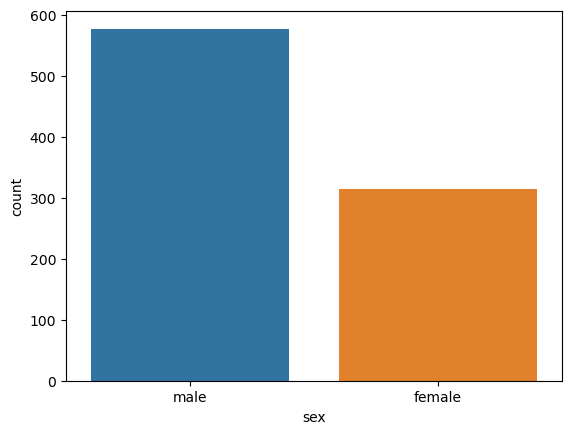

In [15]:
# cat_summary fonksiyonuna veri görselleştirme özelliği de ekleyelim. 
#Elimizde kategorik değişkenler varsa, bunları sütun grafikleri ile görselleştirmeliyiz. 
#Bu amaçla, Seaborn kütüphanesinden countplot() fonksiyonunu kullanarak kategorik değişkenleri görselleştirebiliriz.
def cat_summary(dataframe,col_name,plot=False):
    print({col_name:dataframe[col_name].value_counts(), 
          "Ratio":100*dataframe[col_name].value_counts() / len(dataframe)})
    print("********************************")

    if plot: #eğer True ise; 
       sns.countplot(x=dataframe[col_name], data=dataframe)
       plt.show()
        

cat_summary(df, "sex", plot=True)    


pd.options.mode.chained_assignment = None    # Bu genellikle chained assignment uyarıları içindir  

In [16]:
for col in cat_cols: 
    cat_summary(df,col)

{'sex': sex
male      577
female    314
Name: count, dtype: int64, 'Ratio': sex
male      64.758698
female    35.241302
Name: count, dtype: float64}
********************************
{'embarked': embarked
S    644
C    168
Q     77
Name: count, dtype: int64, 'Ratio': embarked
S    72.278339
C    18.855219
Q     8.641975
Name: count, dtype: float64}
********************************
{'class': class
Third     491
First     216
Second    184
Name: count, dtype: int64, 'Ratio': class
Third     55.106622
First     24.242424
Second    20.650954
Name: count, dtype: float64}
********************************
{'who': who
man      537
woman    271
child     83
Name: count, dtype: int64, 'Ratio': who
man      60.269360
woman    30.415264
child     9.315376
Name: count, dtype: float64}
********************************
{'adult_male': adult_male
True     537
False    354
Name: count, dtype: int64, 'Ratio': adult_male
True     60.26936
False    39.73064
Name: count, dtype: float64}
*********************

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
10%        7.550000
25%        7.910400
50%       14.454200
75%       31.000000
90%       77.958300
max      512.329200
Name: fare, dtype: float64


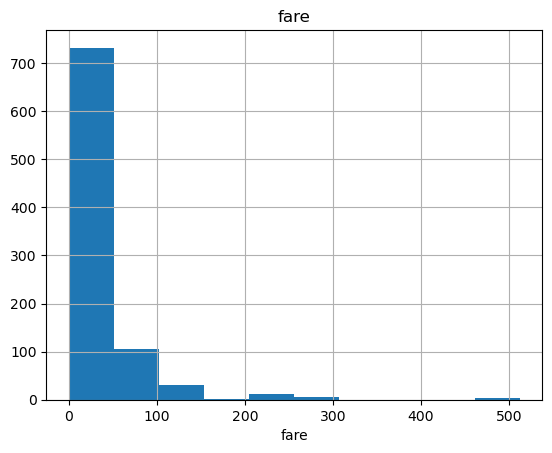

In [17]:
def num_summary (dataframe , numerical_col,plot=False): 
    quantiles =[0.1, 0.25, 0.5, 0.75, 0.9] 
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col) 
        plt.show()

num_summary(df,"fare",plot=True)

In [19]:
for col in num_cols: 
    num_summary(df,col)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
10%       14.000000
25%       20.125000
50%       28.000000
75%       38.000000
90%       50.000000
max       80.000000
Name: age, dtype: float64
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
10%        7.550000
25%        7.910400
50%       14.454200
75%       31.000000
90%       77.958300
max      512.329200
Name: fare, dtype: float64


In [20]:
df["survived"].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [21]:
cat_summary(df,"survived")

{'survived': survived
0    549
1    342
Name: count, dtype: int64, 'Ratio': survived
0    61.616162
1    38.383838
Name: count, dtype: float64}
********************************


Hedef Değişkenin Kategorik Değişkenler İle Analizi
 Kategorik Değişkenlerle Analiz: Kategorik değişkenlerle hedef değişken analiz edilirken, genellikle hedef değişkenin her kategori için ortalaması ya da belirli bir istatistiği hesaplanır. Örneğin, cinsiyet gibi bir kategorik değişken ile hedef değişken olan hayatta kalma oranını analiz etmek için cinsiyete göre hayatta kalma oranları hesaplanabilir.

In [23]:
df.groupby("sex")["survived"].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [24]:
 def target_summary_with_cat(dataframe, target, categorical_col):
     print(pd.DataFrame({"TARGET_MEAN":dataframe.groupby(categorical_col)[target].mean()}))

In [26]:
target_summary_with_cat(df,"survived","sex")

        TARGET_MEAN
sex                
female     0.742038
male       0.188908


In [27]:
for col in cat_cols:
    target_summary_with_cat(df, "survived", col)

        TARGET_MEAN
sex                
female     0.742038
male       0.188908
          TARGET_MEAN
embarked             
C            0.553571
Q            0.389610
S            0.336957
        TARGET_MEAN
class              
First      0.629630
Second     0.472826
Third      0.242363
       TARGET_MEAN
who               
child     0.590361
man       0.163873
woman     0.756458
            TARGET_MEAN
adult_male             
False          0.717514
True           0.163873
      TARGET_MEAN
deck             
A        0.466667
B        0.744681
C        0.593220
D        0.757576
E        0.750000
F        0.615385
G        0.500000
             TARGET_MEAN
embark_town             
Cherbourg       0.553571
Queenstown      0.389610
Southampton     0.336957
       TARGET_MEAN
alive             
no             0.0
yes            1.0
       TARGET_MEAN
alone             
False     0.505650
True      0.303538
          TARGET_MEAN
survived             
0                 0.0
1             

C:\Users\FATMA\AppData\Local\Temp\ipykernel_16568\2698716072.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(pd.DataFrame({"TARGET_MEAN":dataframe.groupby(categorical_col)[target].mean()}))
C:\Users\FATMA\AppData\Local\Temp\ipykernel_16568\2698716072.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(pd.DataFrame({"TARGET_MEAN":dataframe.groupby(categorical_col)[target].mean()}))


Hedef Değişkenin Sayısal Değişkenler İle Aanalizi 
 Sayısal Değişkenlerle Analiz: Sayısal değişkenlerle hedef değişken analiz edilirken, genellikle hedef değişkenin gruplarına göre sayısal bir değişkenin ortalaması ya da diğer istatistiksel değerleri hesaplanır. Örneğin, yaş gibi bir sayısal değişkenin, hedef değişkenin sınıflarına (hayatta kalma durumu) göre ortalaması bulunabilir.

In [28]:
df.groupby("survived").agg({"age": "mean"})

,age
survived,
0,30.626179
1,28.343690


In [35]:
 def target_summary_with_num(dataframe, target, numerical_col):
     print(dataframe.groupby(target).agg({numerical_col:"mean"}))

In [37]:
for col in num_cols: 
    target_summary_with_num(df,"sex",col)

              age
sex              
female  27.915709
male    30.726645
             fare
sex              
female  44.479818
male    25.523893
